# **Introduction to Portfolio Analysis in Python**

## **Chapter 3 - Performance Attribution**

**Active return**

In this first exercise, you're going to calculate the active return of a portfolio that's managed against a benchmark. You've learned many ways of how to calculate total return over a period. For this exercise, you'll use the simple mean returns multiplied with the weights to obtain a total return for both the portfolio as well as the benchmark. Available is portfolio data containing weights and asset returns under portfolio_data. Have a look at the data by running portfolio_data.head(10) in the IPython Shell. Good luck!

In [1]:
import pandas as pd

portfolio_data = pd.read_csv("large_pf.csv")
portfolio_data

,Unnamed: 0,mean_return,variance,pf_weights,bm_weights,Security,GICS Sector,GICS Sub Industry
0,A,0.146146,0.035194,0.000,0.000,Agilent Technologies Inc,Health Care,Health Care Equipment
1,AAL,0.444411,0.094328,0.214,0.000,American Airlines Group,Industrials,Airlines
2,AAP,0.242189,0.029633,0.000,0.000,Advance Auto Parts,Consumer Discretionary,Automotive Retail
3,AAPL,0.225074,0.027283,0.000,0.000,Apple Inc.,Information Technology,Computer Hardware
4,ABBV,0.182541,0.029926,0.000,0.000,AbbVie,Health Care,Pharmaceuticals
...,...,...,...,...,...,...,...,...
496,YHOO,0.162994,0.036719,0.000,0.000,Yahoo Inc.,Information Technology,Internet Software & Services
497,YUM,0.162098,0.023774,0.000,0.000,Yum! Brands Inc,Consumer Discretionary,Restaurants
498,ZBH,0.103081,0.020171,0.000,0.000,Zimmer Biomet Holdings,Health Care,Health Care Equipment
499,ZION,0.225957,0.046199,0.000,0.000,Zions Bancorp,Financials,Regional Banks


In [2]:
portfolio_data.pf_weights.sum()

100.0

In [3]:
# Calculate return of the portfolio
total_return_pf = (portfolio_data['pf_weights']*portfolio_data['mean_return']).sum()
total_return_pf

33.134025872593554

In [4]:
# Calculate return of the benchmark
total_return_bm = (portfolio_data['bm_weights']*portfolio_data['mean_return']).sum()
total_return_bm

10.557642112692943

In [5]:
# Calculate and print the active return
active_return = total_return_pf - total_return_bm
print ("%.2f%%" % active_return)

22.58%


**Industry attribution**

In this exercise, you're going to calculate the relative industry position of your portfolio, versus a benchmark. As a portfolio manager you need to understand your portfolio's underweight and overweight positions (or "industry bets"), as they are a large driver of performance, as well as a potential source of risk.

The DataFrame portfolio_data is available, containing details about the industry classification, obtained from the Global Industry Classification System or "GICS", of your portfolio holdings, as well as your portfolio weights and the benchmark weights.

In [6]:
# Print the sum of the bm and pf weights
print (portfolio_data.bm_weights.sum())
print (portfolio_data.pf_weights.sum())

100.001
100.0


In [7]:
# Group dataframe by GICS sectors
grouped_df=portfolio_data.groupby('GICS Sector').sum()
grouped_df

<ipython-input-7-c39348d1b6f2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df=portfolio_data.groupby('GICS Sector').sum()


,mean_return,variance,pf_weights,bm_weights
GICS Sector,,,,
Consumer Discretionary,14.091950,3.011996,32.426,12.169
Consumer Staples,5.131286,0.639845,24.551,29.727
Energy,3.390600,1.897641,0.000,0.000
Financials,8.701437,1.879873,0.000,2.116
Health Care,10.747583,2.349866,11.964,9.099
Industrials,11.336994,2.240226,14.142,11.677
Information Technology,11.217113,2.651298,14.903,6.210
Materials,3.033814,0.877748,0.000,2.043
Real Estate,3.959113,0.728886,2.014,0.000


In [8]:
# Calculate active weights of portfolio
grouped_df['active_weight']=grouped_df['pf_weights']-grouped_df['bm_weights']
print (grouped_df['active_weight'])

GICS Sector
Consumer Discretionary         20.257
Consumer Staples               -5.176
Energy                          0.000
Financials                     -2.116
Health Care                     2.865
Industrials                     2.465
Information Technology          8.693
Materials                      -2.043
Real Estate                     2.014
Telecommunications Services    -1.367
Utilities                     -25.593
Name: active_weight, dtype: float64


**Question**

Which of these statements about the portfolio's positions are correct?

**Answers:**

- The portfolio is overweight Consumer Discretionary which lead to a positive performance versus benchmark
- The portfolio is neither underweight, or overweight on Energy
- The portfolio is underweight on 5 sectors, as well as overweight on 5 sectors, and these weights balance each other out

**Size factor**

Stocks with a lower market value (mid and small caps) typically realize higher returns than those with a higher market value or capitalization (large caps). The size factor measures this difference in return between small cap companies relative to large cap companies. Suppose you would take the correlation of the S&P500 returns and the size factor returns. What would you expect to find?

**Answers**

I would expect a positive correlation between the size factor and the S&P500 returns.

**Momentum factor**

In this exercise, you are going to investigate the correlation of the S&P500 returns with 2 factors, momentum and value.

A stock is showing "momentum" if its prior 12-month average of returns is positive. The momentum factor is therefore formed by combining stocks that show consistent positive historic returns. The value factor looks at stocks that are inexpensive relative to some measure of fundamental value. For example price-to-earnings and price-to-book are typically ratios to measure "value". Let's see how our S&P500 returns relate to the returns of these factors.

Available is a DataFrame df containing the returns of the two factors and the S&P500 over time.

In [9]:
df = pd.read_csv("factors.csv")
df

,date,sp500,momentum,value
0,2015-01-02,NaN,-0.11,-0.18
1,2015-01-05,-1.827811,1.02,-1.76
2,2015-01-06,-0.889347,0.41,-0.82
3,2015-01-07,1.162984,1.07,1.39
4,2015-01-08,1.788828,0.31,1.93
...,...,...,...,...
1054,2019-03-13,0.694958,-0.13,0.66
1055,2019-03-14,-0.086802,0.39,-0.12
1056,2019-03-15,0.498490,0.06,0.72
1057,2019-03-18,0.370595,-0.45,0.57


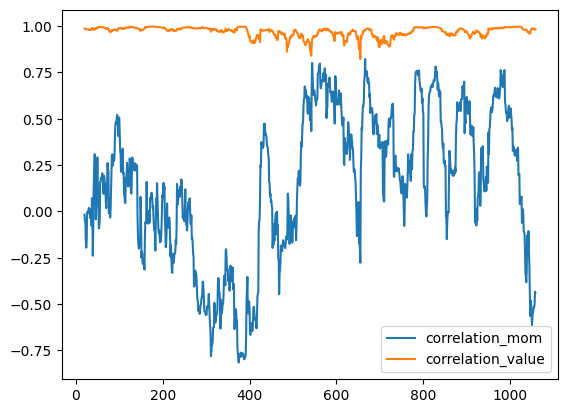

In [10]:
import matplotlib.pyplot as plt

# Calculate 20-day rolling correlation with momentum
df['correlation_mom']=df['sp500'].rolling(20).corr(df['momentum'])

# Calculate 20-day rolling correlation with value
df['correlation_value']=df['sp500'].rolling(20).corr(df['value'])

# Plot the correlations
df['correlation_mom'].plot()
df['correlation_value'].plot()
plt.legend()
plt.show()

**Question**

Which statement is correct when looking at the factor exposures of the S&P500?

**Answer**

The S&P500 returns are sometimes highly correlated with momentum and most of the time highly correlated to value

**Value factor**

In the previous exercise you've looked at the S&P500 exposures, and saw that there was a large consistent exposure to the value factor, but a very fluctuating correlation to momentum.

Let's now check how our portfolio measures up to this, and let's especially focus on value. Available to you is a DataFrame called factor_data containing the factor returns as well as your portfolio returns. Start by inspecting the DataFrame factor_data in the IPython shell using factor_data.head().

In [11]:
factor_data = pd.read_csv("pf_factors.csv")
factor_data

,date,S&P500,WML,value_factor,portfolio
0,2016-01-04,-1.530373,-1.69,-1.53,-1.651745
1,2016-01-05,0.201223,0.38,0.10,0.408161
2,2016-01-06,-1.311540,1.27,-1.22,0.325555
3,2016-01-07,-2.370044,0.21,-2.38,-0.698259
4,2016-01-08,-1.083837,-0.20,-0.91,-0.959352
...,...,...,...,...,...
247,2016-12-23,0.125172,-0.35,0.07,0.438153
248,2016-12-27,0.224837,0.14,0.27,0.430411
249,2016-12-28,-0.835653,0.08,-0.69,-0.903525
250,2016-12-29,-0.029330,0.02,0.00,0.235954


In [12]:
# Calculate the pairwise correlation
factor_data.corr()

<ipython-input-12-2b8f10f3faa5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  factor_data.corr()


,S&P500,WML,value_factor,portfolio
S&P500,1.000000,-0.389313,0.981045,0.751926
WML,-0.389313,1.000000,-0.363237,0.001012
value_factor,0.981045,-0.363237,1.000000,0.767663
portfolio,0.751926,0.001012,0.767663,1.000000


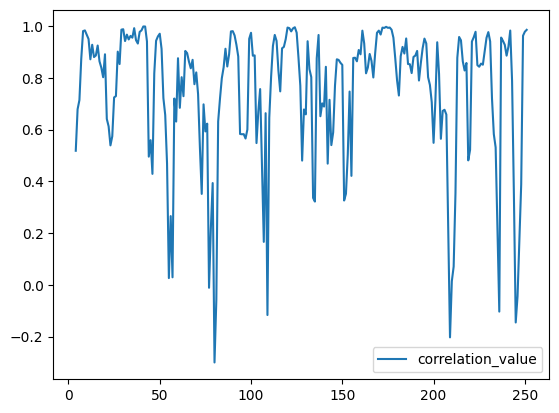

In [13]:
# Calculate rolling 5 day correlation
factor_data['correlation_value']=factor_data['portfolio'].rolling(5).corr(factor_data['value_factor'])

# Plot the rolling correlation
factor_data['correlation_value'].plot()
plt.legend()
plt.show()

**Question**

In the correlation graph between your portfolio and the value factor, you see that it fluctuates and dips to a low correlation occasionally. What could be the reason the correlation suddenly dips?

**Answer**

- By changing your portfolio weights based on your investment strategy, the underlying factor exposures alse change
- The underlying returns of the stocks that make up the total value factor returns can fluctuate heavily, causing the factor returns to deviate from your portfolios return
- The composition of the value factor chagnes over time, i.e. then stocks that are deemed high "value" will change over time, and thereby the factor returns can deviate from the portfolio returns

**Fama French factor correlations**

In this exercise you want to check how much correlation your portfolio returns have with the Fama French factors. With a quick correlation table, you can very easily gain insight into how your portfolio returns move with for example the excess market return or the size and value factors. Remember, the Fama French factor model was defined as follows:

\begin{align}
R_{pf} = α + β_mMKT + β_sSMB + β_hHML
\end{align}

- MKT is the excess return of the market,i.e. $R_m - R_f$
- SMB (Small Minus Big) a size factor
- HML (High Minus Low) a value factor

Available is the data containing the factor returns and your portfolio returns under factor_returns. Let's give it a try!

In [14]:
factor_returns = pd.read_csv("factors_pf_returns.csv")
factor_returns

,date,Mkt-RF,SMB,HML,RF,pf_returns
0,2016-01-04,-1.59,-0.83,0.53,0.000,-1.651745
1,2016-01-05,0.12,-0.22,0.01,0.000,0.408161
2,2016-01-06,-1.35,-0.12,0.00,0.000,0.325555
3,2016-01-07,-2.44,-0.29,0.08,0.000,-0.698259
4,2016-01-08,-1.11,-0.47,-0.03,0.000,-0.959352
...,...,...,...,...,...,...
247,2016-12-23,0.19,0.56,-0.52,0.001,0.438153
248,2016-12-27,0.27,0.21,0.13,0.001,0.430411
249,2016-12-28,-0.87,-0.27,0.08,0.001,-0.903525
250,2016-12-29,-0.04,0.13,-0.31,0.001,0.235954


In [15]:
# Print the correlation table
print(factor_returns.corr())

              Mkt-RF       SMB       HML        RF  pf_returns
Mkt-RF      1.000000  0.331250  0.099800  0.087073    0.738586
SMB         0.331250  1.000000 -0.108081  0.076750    0.162303
HML         0.099800 -0.108081  1.000000 -0.049019   -0.237647
RF          0.087073  0.076750 -0.049019  1.000000    0.039383
pf_returns  0.738586  0.162303 -0.237647  0.039383    1.000000


<ipython-input-15-79399b9413ff>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(factor_returns.corr())


**Linear regression model**

In this exercise you're going to use the Fama French model to explain the returns in your portfolio. You'll first walk through the linear regression model taking all the different steps, and obtain the summary at the end to interpret the results.

In this exercise you'll use statsmodels. You might have come across the linear regression model in scikit-learn. If you are curious how the two options compare, you can read more in this blogpost.

Available is a dataset called factor_returns which contains portfolio returns as well as the Fama French factors. Good luck!

In [16]:
import statsmodels.api as sm

# Define the model
model = sm.OLS(factor_returns['pf_returns'], factor_returns[['Mkt-RF','SMB', 'HML']]).fit()

# Create model predictions
predictions = model.predict(factor_returns[['Mkt-RF','SMB', 'HML']])

# Print out the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pf_returns   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.653
Method:                 Least Squares   F-statistic:                              158.8
Date:                Sun, 27 Aug 2023   Prob (F-statistic):                    1.55e-57
Time:                        21:03:42   Log-Likelihood:                         -185.67
No. Observations:                 252   AIC:                                      377.3
Df Residuals:                     249   BIC:                                      387.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.8234      0.040     20.627      0.000       0.745       0.902
SMB           -0.2272      0.064     -3.545      0.000      -0.353      -0.101
HML           -0.4826      0.056     -8.611      0.000      -0.593      -0.372
==============================================================================
Omnibus:                      143.224   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1746.552
Skew:                           1.972   Prob(JB):                         0.00
Kurtosis:                      15.279   Cond. No.                         1.89
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question**

What can you say about how the Fama French factors explain the portfolio returns? Do they significantly explain the portfolio returns?

**Answer**

The market excess returns are positively related to the portfolio returns, and the other two factors SMB and HML are negatively related. They all have a significant effect on the portfolio returns

**Fama French Factor model**

In this exercise, you are going focus on efficiently obtaining just the beta coefficients of the Fama French model. As you've seen in the video, those betas indicate how much of the portfolio's return changes if that particular factor's return changes.

Sometimes, all you want to do is to check whether the factor relates negatively, or positively to you portfolio returns. You can see this directly from the signs of the coefficients. Available again is the factor_returns data for you. Let's try!

In [17]:
# Obtain the beta coefficients
b1, b2, b3 = sm.OLS(factor_returns['pf_returns'], factor_returns[['Mkt-RF','SMB', 'HML']]).fit().params

# Print the betas
print ('Sensitivities of active returns to factors:\nMkt-Rf: %f\nSMB: %f\nHML: %f' %  (b1, b2, b3))

Sensitivities of active returns to factors:
Mkt-Rf: 0.823443
SMB: -0.227198
HML: -0.482598


**Performance tear sheet**

In this exercise, you're going to create a full performance tear sheet on the S&P500 returns. You'll see that the elaborate calculations you've done in previous chapters, can very quickly be generated with this simple tear sheet, and by inputting just the returns data. In that sense, this tear sheet can save you a lot of time!

In the first few steps, you'll have to make sure that the data is in the right format otherwise, Pyfolio will give an error. The returns data is available as returns_sp500. Go ahead and inspect the returns_sp500 data in the IPython shell using returns_sp500.head().

In [18]:
sp500_value_full = pd.read_csv("sp500.csv")
sp500_value_full = sp500_value_full.set_index('date')
returns_sp500 = sp500_value_full.pct_change()
returns_sp500

,S&P500
date,
2015-01-02,NaN
2015-01-05,-0.018278
2015-01-06,-0.008893
2015-01-07,0.011630
2015-01-08,0.017888
...,...
2019-03-13,0.006950
2019-03-14,-0.000868
2019-03-15,0.004985


In [24]:
!pip install zipline

  Using cached zipline-1.4.1.tar.gz (5.4 MB)
  Preparing metadata (setup.py) ... done
  Using cached Logbook-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (497 kB)
  Using cached python-interface-1.6.1.tar.gz (19 kB)
  Preparing metadata (setup.py) ... done
  Using cached pandas-0.22.0.tar.gz (11.3 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [25]:
# remove your installed pyfolio library
# pip uninstall pyfolio

# Install it again from its github repo
!pip install git+https://github.com/quantopian/pyfolio

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-ag9bemm6
  Running command git clone --filter=blob:none --quiet https://github.com/quantopian/pyfolio /tmp/pip-req-build-ag9bemm6
  Resolved https://github.com/quantopian/pyfolio to commit 4b901f6d73aa02ceb6d04b7d83502e5c6f2e81aa
  Preparing metadata (setup.py) ... done


In [26]:
import pyfolio as pf

Start date,2015-01-02
End date,2019-03-19
Total months,50
,Backtest
Annual return,7.896%
Cumulative returns,37.624%
Annual volatility,13.668%
Sharpe ratio,0.63
Calmar ratio,0.40
Stability,0.85
Max drawdown,-19.778%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,19.78,2018-09-20,2018-12-24,NaT,NaN
1,14.16,2015-05-21,2016-02-11,2016-07-11,298
2,10.16,2018-01-26,2018-02-08,2018-08-24,151
3,4.79,2016-08-15,2016-11-04,2016-11-21,71
4,3.64,2015-03-02,2015-03-11,2015-04-24,40


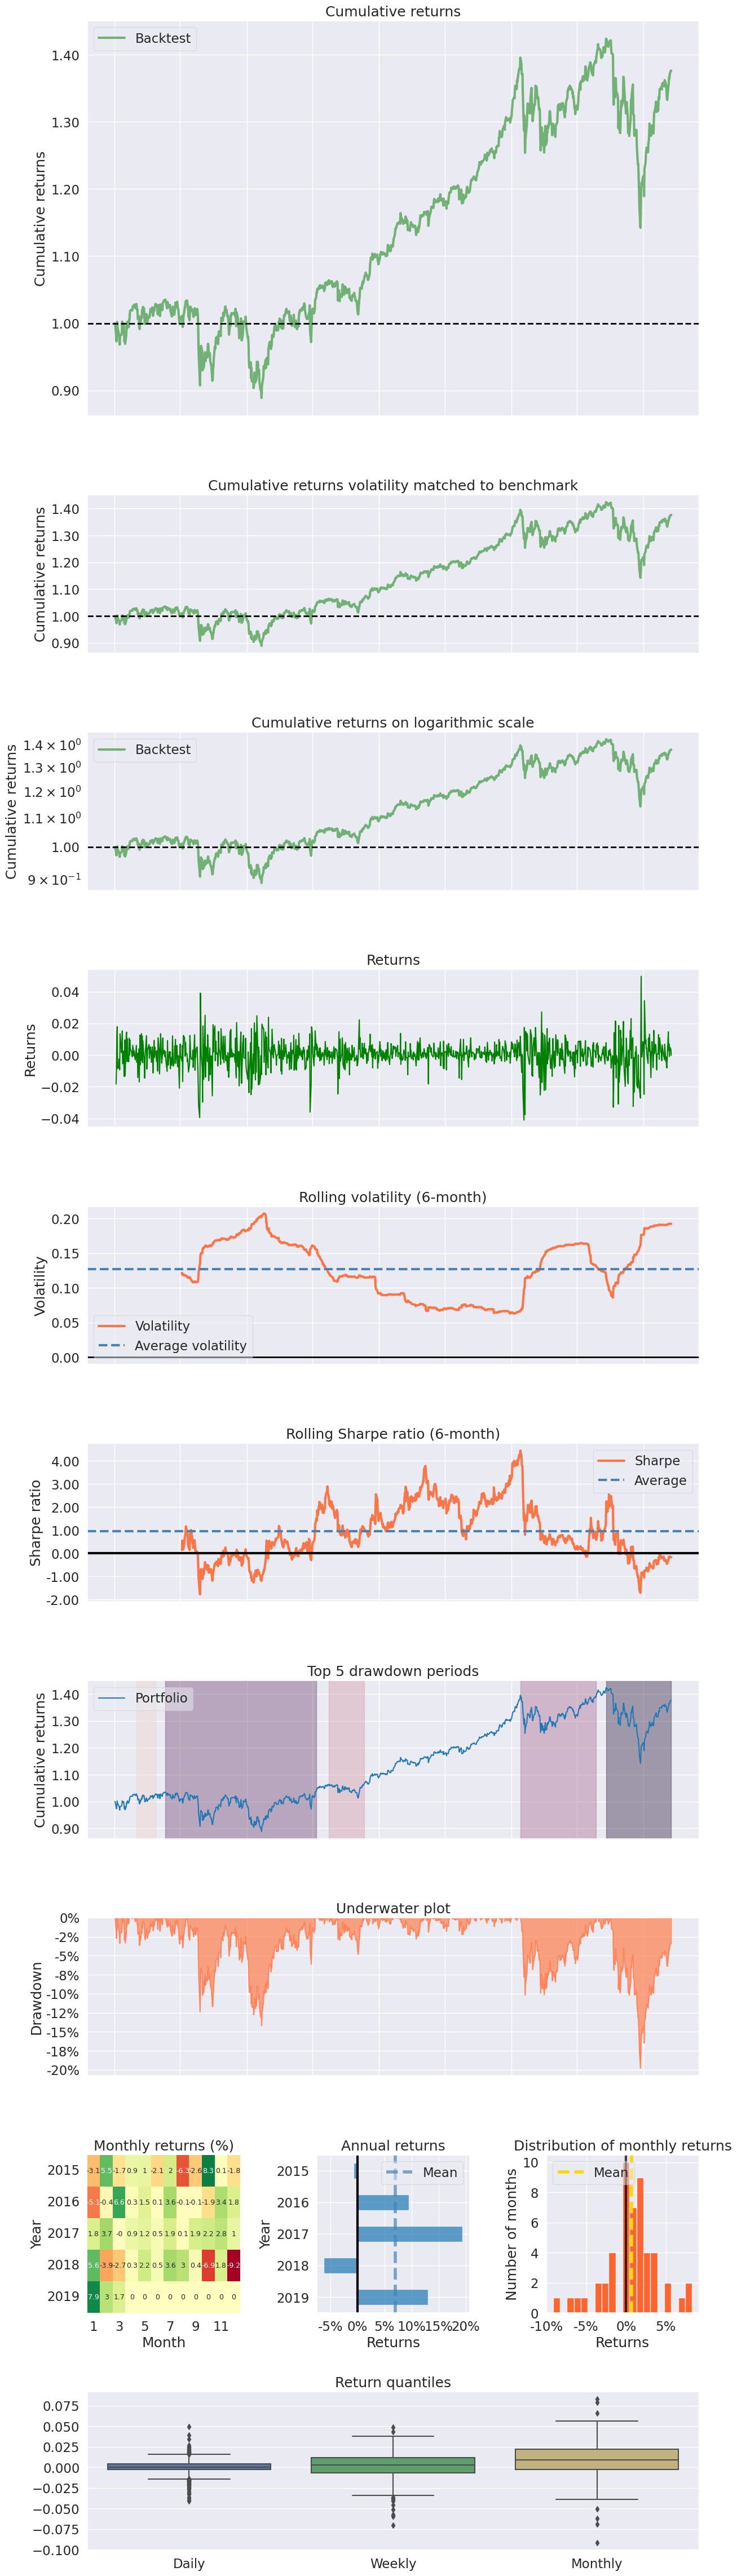

In [28]:
# Set the index to datetime
returns_sp500.index=pd.to_datetime(returns_sp500.index)

# Ensure the returns are a series
returns=returns_sp500['S&P500']

import warnings
warnings.filterwarnings("ignore")

# Create the returns tear sheet
fig = pf.create_returns_tear_sheet(returns, return_fig=True)
plt.savefig('Portfolio_1.jpg')

**Industry exposures with Pyfolio**

You saw in the first video of this chapter how to use a groupby function to create the active weights per industry. The drawback is that it takes a snapshot in time. Since portfolio weights change, you can imagine that the industry exposures change over time as well. However, the calculation to determine industry exposures on each day for your portfolio, can become quite tedious and complex.

Luckily, you can use Pyfolio's tear sheet for this. The tear sheet shows you exposures over time, and summarizes overall top stock picks in your portfolio. Available is data on your portfolio returns under returns, and your daily positions in dollar value per stock, under positions. Go ahead and inspect positions and returns in the console.

In [52]:
positions = pd.read_csv("positions_industry.csv")
positions = positions.set_index('index')
positions

,AMD,CERN,COST,DELL,GPS,INTC,MMM,cash
index,,,,,,,,
2004-01-09 00:00:00+00:00,6961.92,21017.078750,7282.266152,21264.55188,7091.080020,21259.333890,21316.129606,-6192.360298
2004-01-12 00:00:00+00:00,18198.58,18071.250000,17675.836401,10804.31924,10685.411865,17872.477480,10882.026400,-3329.289887
2004-01-13 00:00:00+00:00,12060.86,11942.246250,12838.477446,16078.90380,16272.139000,12465.392511,12579.135758,4708.039735
2004-01-14 00:00:00+00:00,13102.40,15534.281250,14447.422640,15414.45080,15666.440185,14884.069620,13454.542620,-2749.470030
2004-01-15 00:00:00+00:00,15518.40,14547.050000,14164.039680,14407.48813,14926.122619,14422.385864,13929.159049,-2462.919316
...,...,...,...,...,...,...,...,...
2009-12-24 00:00:00+00:00,-1199.11,1316.857500,22778.660580,-3562.47039,76601.638113,36280.269375,17740.890304,16350.679211
2009-12-28 00:00:00+00:00,589.80,673.840032,24170.422856,-1765.41500,83143.517604,37499.607147,15692.520137,7641.201795
2009-12-29 00:00:00+00:00,292.50,334.920016,20993.396552,858.85252,94500.729990,50509.461877,7946.648597,-6583.290764


In [53]:
returns = pd.read_csv("returns_industry.csv")
returns = returns.set_index('0')
returns

,1
0,
2004-01-02 00:00:00+00:00,0.000000
2004-01-05 00:00:00+00:00,0.000000
2004-01-06 00:00:00+00:00,0.000000
2004-01-07 00:00:00+00:00,0.000000
2004-01-08 00:00:00+00:00,0.000000
...,...
2009-12-24 00:00:00+00:00,-0.001067
2009-12-28 00:00:00+00:00,0.008046
2009-12-29 00:00:00+00:00,0.007204


Top 10 long positions of all time,max
COST,90.01%
DELL,85.73%
CERN,83.53%
MMM,82.09%
INTC,78.59%
AMD,75.76%
GPS,62.24%


Top 10 short positions of all time,max
AMD,-30.12%
DELL,-26.58%
CERN,-25.51%
MMM,-22.62%
GPS,-20.09%
INTC,-18.47%
COST,-16.44%


Top 10 positions of all time,max
COST,90.01%
DELL,85.73%
CERN,83.53%
MMM,82.09%
INTC,78.59%
AMD,75.76%
GPS,62.24%


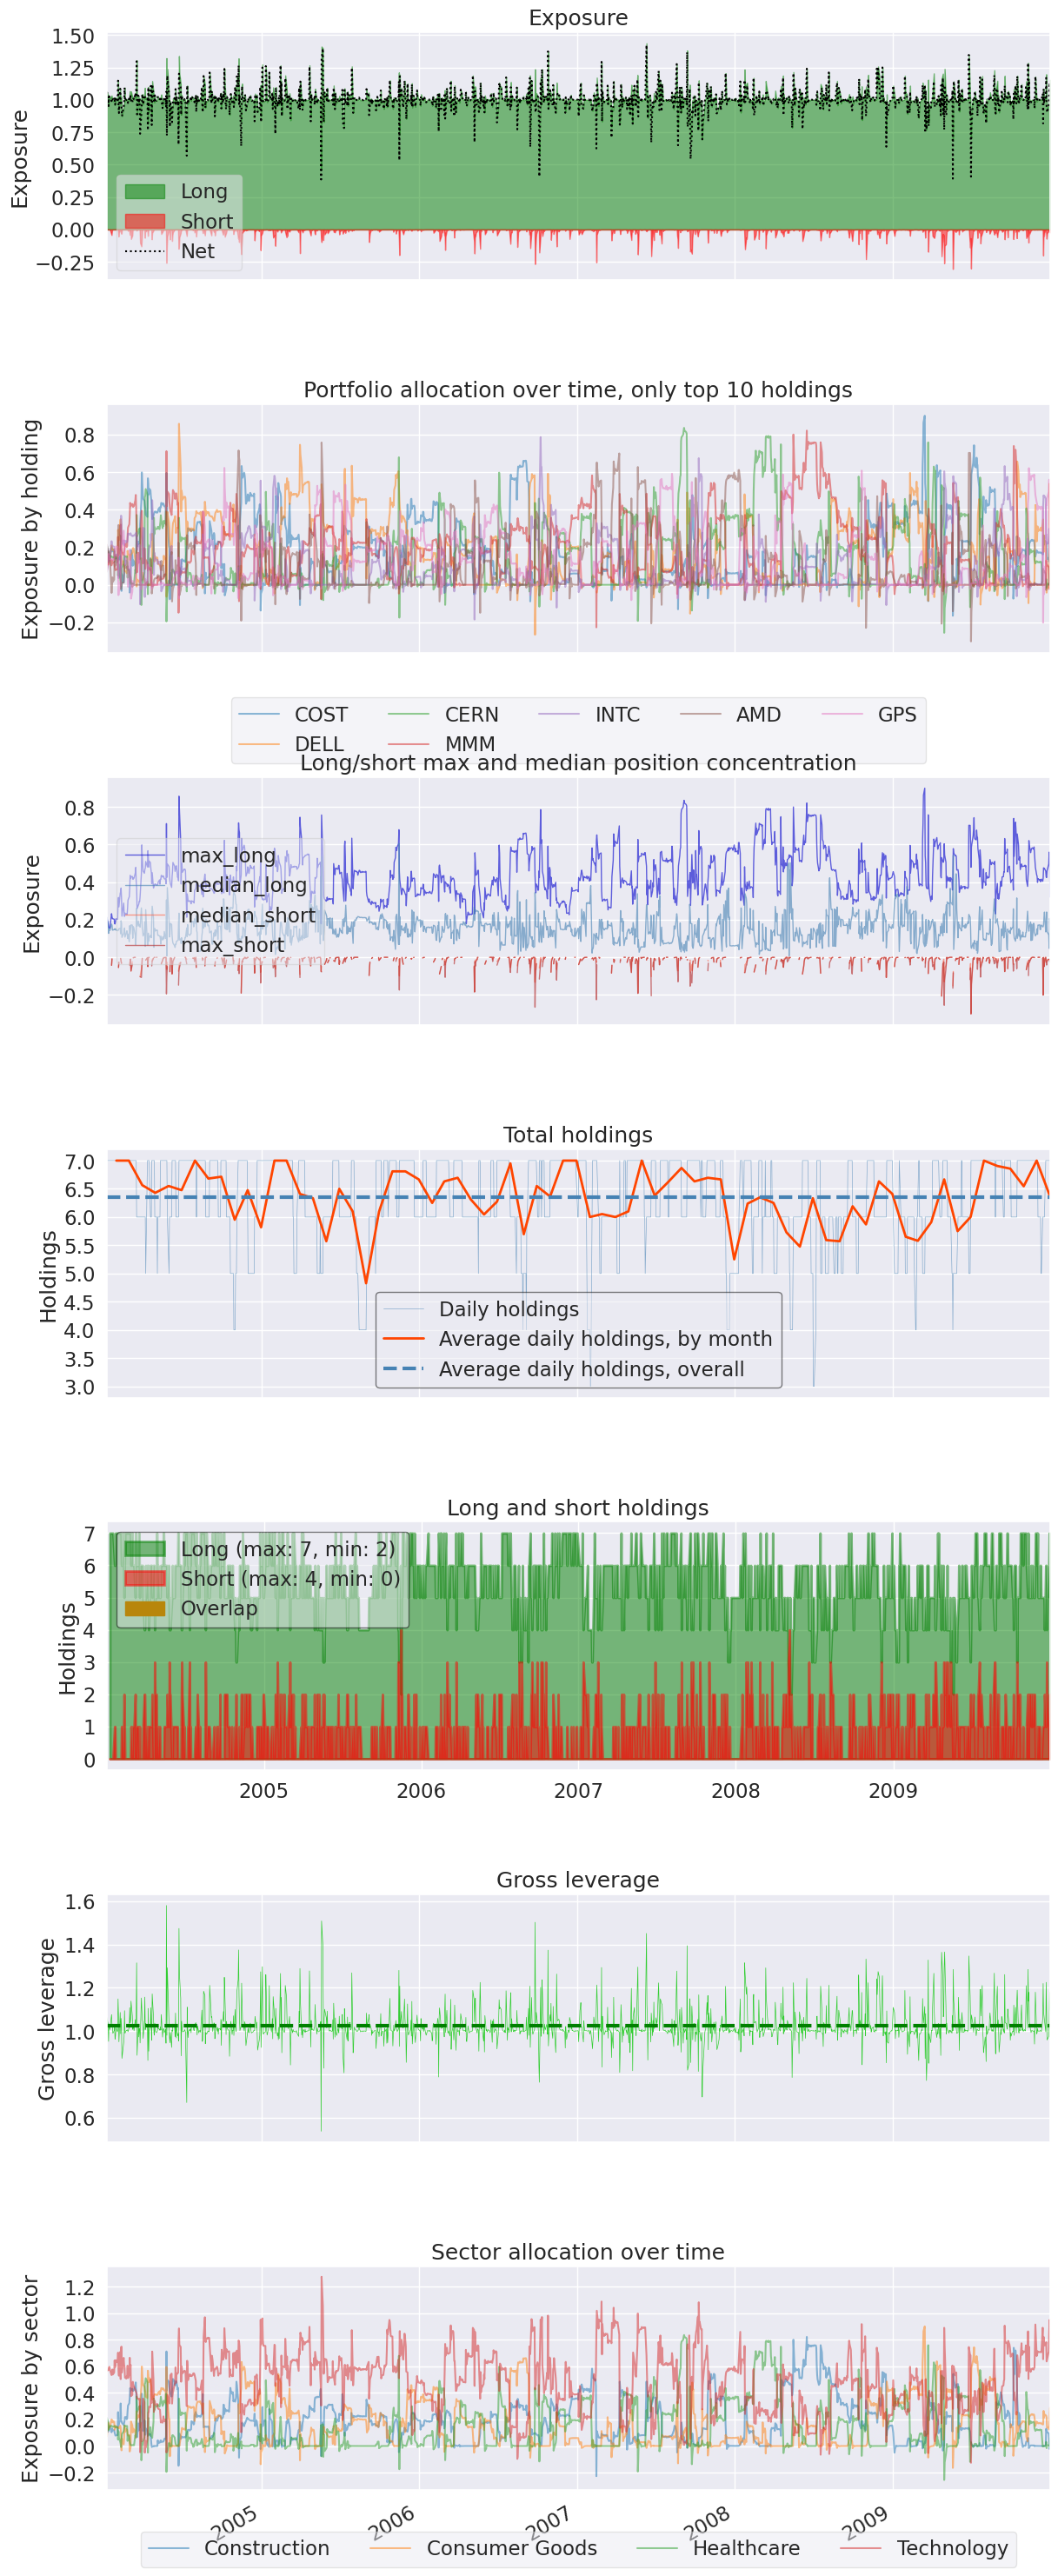

In [54]:
# Set the index to datetime
returns.index=pd.to_datetime(returns.index)

# Set the index to datetime
positions.index=pd.to_datetime(positions.index)

# Define sector mappings
sect_map = {'COST': 'Consumer Goods',
            'INTC': 'Technology',
            'CERN': 'Healthcare',
            'GPS': 'Technology',
            'MMM': 'Construction',
            'DELL': 'Technology',
            'AMD': 'Technology'}

# Create sector exposure tear sheet
pf.create_position_tear_sheet(returns, positions, sector_mappings=sect_map)
plt.savefig('Portfolio_2.jpg')

**Question**

Inspecting the tear sheet, what is your top stock pick overall, and to which industry do you have the biggest overweight position over time?

**Answer**

The top holding is COST, and the biggest sector exposure is Technology